In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Chicago_crime_analysis").getOrCreate()

In [2]:
spark

In [3]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

In [4]:
crimes = spark.read.csv("C:\\Users\kotib\Documents\Development\Opdracht\city_of_chicago_crimes_2001_to_present.csv",
                       header = True, 
                        schema = crimes_schema)

In [5]:
crimes

DataFrame[ID: string, CaseNumber: string, Date: string, Block: string, IUCR: string, PrimaryType: string, Description: string, LocationDescription: string, Arrest: boolean, Domestic: boolean, Beat: string, District: string, Ward: string, CommunityArea: string, FBICode: string, XCoordinate: double, YCoordinate: double, Year: int, UpdatedOn: date, Latitude: double, Longitude: double, Location: string]

In [6]:
print(" The crimes dataframe has {} records".format(crimes.count()))

 The crimes dataframe has 6747040 records


In [7]:
crimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [8]:
crimes.dtypes

[('ID', 'string'),
 ('CaseNumber', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('PrimaryType', 'string'),
 ('Description', 'string'),
 ('LocationDescription', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('CommunityArea', 'string'),
 ('FBICode', 'string'),
 ('XCoordinate', 'double'),
 ('YCoordinate', 'double'),
 ('Year', 'int'),
 ('UpdatedOn', 'date'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

In [9]:
crimes.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: date (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [10]:
crimes.select("Date").show(10, truncate = False)

+----------------------+
|Date                  |
+----------------------+
|03/18/2015 07:44:00 PM|
|03/18/2015 11:00:00 PM|
|03/18/2015 10:45:00 PM|
|03/18/2015 10:30:00 PM|
|03/18/2015 09:00:00 PM|
|03/18/2015 10:00:00 PM|
|03/18/2015 11:00:00 PM|
|03/18/2015 09:35:00 PM|
|03/18/2015 10:09:00 PM|
|03/18/2015 09:25:00 PM|
+----------------------+
only showing top 10 rows



In [31]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = crimes.withColumn('Date_time', myfunc(col('Date'))).drop("Date")
df.select(df["Date_time"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2015-03-18 19:44:00|
|2015-03-18 23:00:00|
|2015-03-18 22:45:00|
|2015-03-18 22:30:00|
|2015-03-18 21:00:00|
+-------------------+
only showing top 5 rows



In [12]:
crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe().show()

+-------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|           Latitude|          Longitude|             Year|       XCoordinate|       YCoordinate|
+-------+-------------------+-------------------+-----------------+------------------+------------------+
|  count|            6686639|            6686639|          6747040|           6686639|           6686639|
|   mean| 41.841984448335204|  -87.6718121010152|2008.319304910005|1164514.1448328525|1885709.8140022215|
| stddev|0.09003034396706244|0.06215255522777964|5.007506095308818| 17175.38947907582| 32717.43855968185|
|    min|       36.619446395|      -91.686565684|             2001|               0.0|               0.0|
|    max|       42.022910333|      -87.524529378|             2018|         1205119.0|         1951622.0|
+-------+-------------------+-------------------+-----------------+------------------+------------------+



In [13]:
from pyspark.sql.functions import format_number
result = crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe()
result.select(result['summary'],
              format_number(result['Latitude'].cast('float'),2).alias('Latitude'),
              format_number(result['Longitude'].cast('float'),2).alias('Longitude'),
              result['Year'].cast('int').alias('year'),
              format_number(result['XCoordinate'].cast('float'),2).alias('XCoordinate'),
              format_number(result['YCoordinate'].cast('float'),2).alias('YCoordinate')
             ).show()

+-------+------------+------------+-------+------------+------------+
|summary|    Latitude|   Longitude|   year| XCoordinate| YCoordinate|
+-------+------------+------------+-------+------------+------------+
|  count|6,686,639.00|6,686,639.00|6747040|6,686,639.00|6,686,639.00|
|   mean|       41.84|      -87.67|   2008|1,164,514.12|1,885,709.88|
| stddev|        0.09|        0.06|      5|   17,175.39|   32,717.44|
|    min|       36.62|      -91.69|   2001|        0.00|        0.00|
|    max|       42.02|      -87.52|   2018|1,205,119.00|1,951,622.00|
+-------+------------+------------+-------+------------+------------+



In [14]:
crimes.select("PrimaryType").distinct().count()

35

In [15]:
crimes.select("PrimaryType").distinct().show(n = 35)

+--------------------+
|         PrimaryType|
+--------------------+
|OFFENSE INVOLVING...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
+--------------------+



In [16]:
crimes.where(crimes["PrimaryType"] == "HOMICIDE").count()

9425

In [17]:
crimes.filter((crimes["PrimaryType"] == "ASSAULT") & (crimes["Domestic"] == "True")).count()

91598

In [18]:
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic']

crimes.where((crimes["PrimaryType"] == "HOMICIDE") & (crimes["Arrest"] == "true"))\
                                                        .select(columns).show(10)

+-----------+-------------------+------+--------+
|PrimaryType|        Description|Arrest|Domestic|
+-----------+-------------------+------+--------+
|   HOMICIDE|FIRST DEGREE MURDER|  true|    true|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|   false|
|   HOMICIDE|FIRST DEGREE MURDER|  true|    true|
+-----------+-------------------+------+--------+
only showing top 10 rows



In [19]:
crimes.select(columns).limit(10). show(truncate = True)

+-------------+--------------------+------+--------+
|  PrimaryType|         Description|Arrest|Domestic|
+-------------+--------------------+------+--------+
|      BATTERY| AGGRAVATED: HANDGUN| false|   false|
|OTHER OFFENSE|    PAROLE VIOLATION|  true|   false|
|      BATTERY|DOMESTIC BATTERY ...| false|    true|
|      BATTERY|              SIMPLE| false|   false|
|      ROBBERY|      ARMED: HANDGUN| false|   false|
|      BATTERY|              SIMPLE| false|   false|
|      BATTERY|DOMESTIC BATTERY ...| false|    true|
|      BATTERY|DOMESTIC BATTERY ...| false|    true|
|    NARCOTICS|POSS: CANNABIS 30...|  true|   false|
|      BATTERY|              SIMPLE| false|   false|
+-------------+--------------------+------+--------+



In [20]:
lat_max = crimes.agg({"Latitude" : "max"}).collect()[0][0]
print("The maximum latitude values is {}".format(lat_max))

The maximum latitude values is 42.022910333


In [21]:
df = crimes.withColumn("difference_from_max_lat",lat_max - crimes["Latitude"])
df.select(["Latitude", "difference_from_max_lat"]).show(5)

+------------+-----------------------+
|    Latitude|difference_from_max_lat|
+------------+-----------------------+
|41.891398861|    0.13151147199999969|
|41.773371528|    0.24953880500000025|
| 41.81386068|      0.209049653000001|
|41.800802415|    0.22210791799999896|
|41.878064761|    0.14484557200000125|
+------------+-----------------------+
only showing top 5 rows



In [22]:
df = crimes.withColumnRenamed("Latitude", "Lat")
columns = ['PrimaryType', 'Description', 'Arrest', 'Domestic','Lat']

In [23]:
df.agg({"Lat":"avg"}).show()

+------------------+
|          avg(Lat)|
+------------------+
|41.841984448335204|
+------------------+



In [24]:
from pyspark.sql.functions import max,min
df.select(max("Xcoordinate"),min("Xcoordinate")).show()

+----------------+----------------+
|max(Xcoordinate)|min(Xcoordinate)|
+----------------+----------------+
|       1205119.0|             0.0|
+----------------+----------------+



In [25]:
df.filter(df["Domestic"]==True).count()/df.count() * 100

13.11715952476938

In [26]:
from pyspark.sql.functions import corr
df.select(corr("Lat","Ycoordinate")).show()

+----------------------+
|corr(Lat, Ycoordinate)|
+----------------------+
|    0.9999933497294156|
+----------------------+



In [27]:
df.groupBy("Year").count().show()
df.groupBy("Year").count().collect()

+----+------+
|Year| count|
+----+------+
|2003|475936|
|2007|436999|
|2018|229998|
|2015|263929|
|2006|448097|
|2013|307030|
|2014|275200|
|2004|469381|
|2012|335921|
|2009|392663|
|2016|268813|
|2001|485749|
|2005|453703|
|2010|370290|
|2011|351749|
|2008|427038|
|2017|267791|
|2002|486753|
+----+------+



[Row(Year=2003, count=475936),
 Row(Year=2007, count=436999),
 Row(Year=2018, count=229998),
 Row(Year=2015, count=263929),
 Row(Year=2006, count=448097),
 Row(Year=2013, count=307030),
 Row(Year=2014, count=275200),
 Row(Year=2004, count=469381),
 Row(Year=2012, count=335921),
 Row(Year=2009, count=392663),
 Row(Year=2016, count=268813),
 Row(Year=2001, count=485749),
 Row(Year=2005, count=453703),
 Row(Year=2010, count=370290),
 Row(Year=2011, count=351749),
 Row(Year=2008, count=427038),
 Row(Year=2017, count=267791),
 Row(Year=2002, count=486753)]

In [28]:
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

,count,year
0,475936,2003
1,436999,2007
2,229998,2018
3,263929,2015
4,448097,2006


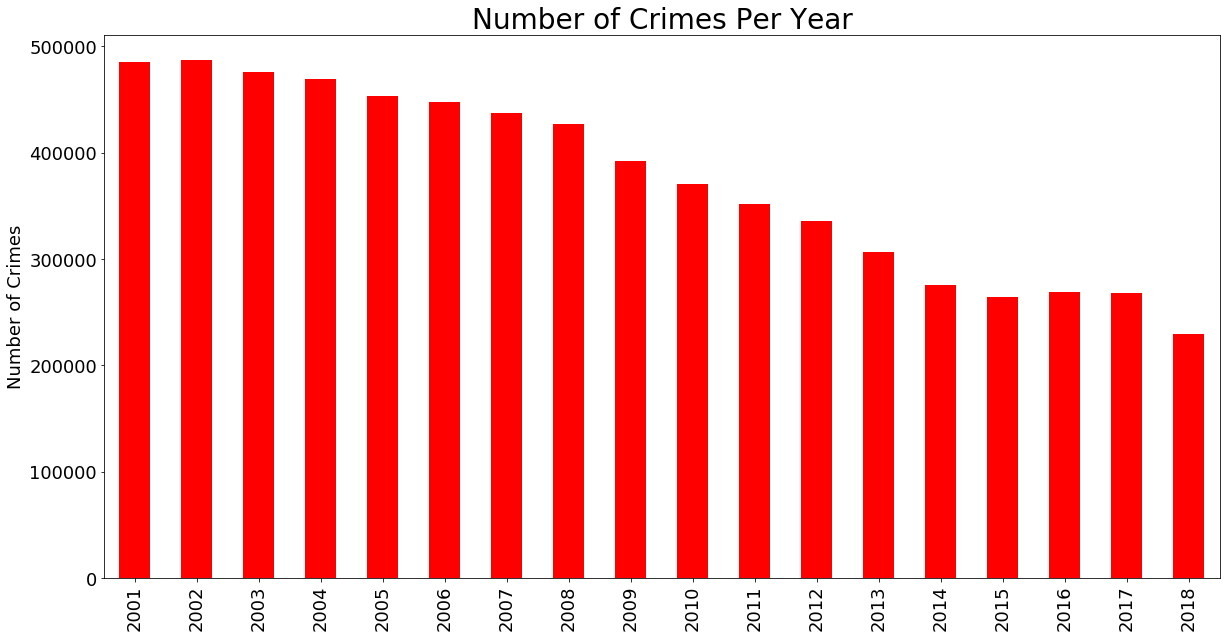

In [29]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")
number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "red",
                               x = "year", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

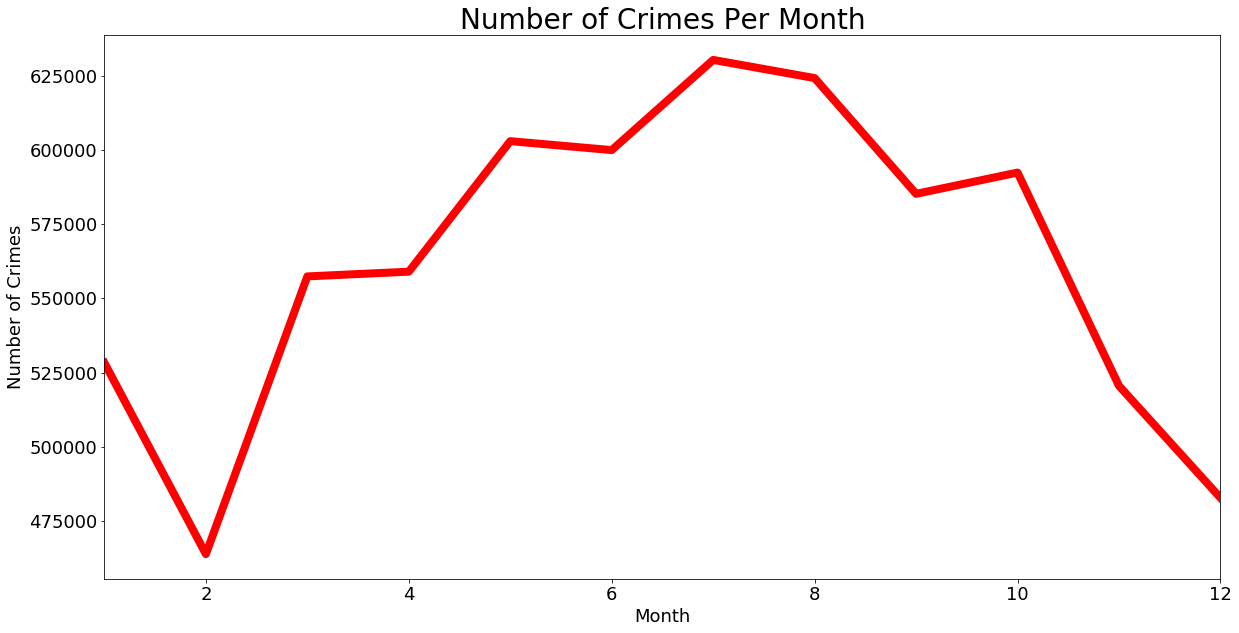

In [32]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month('Date_time'))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
crimes_per_month = {"month":months, "crime_count": count}
crimes_per_month = pd.DataFrame(crimes_per_month)
crimes_per_month = crimes_per_month.sort_values(by = "month")
crimes_per_month.plot(figsize = (20,10), kind = "line", x = "month", y = "crime_count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Month", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

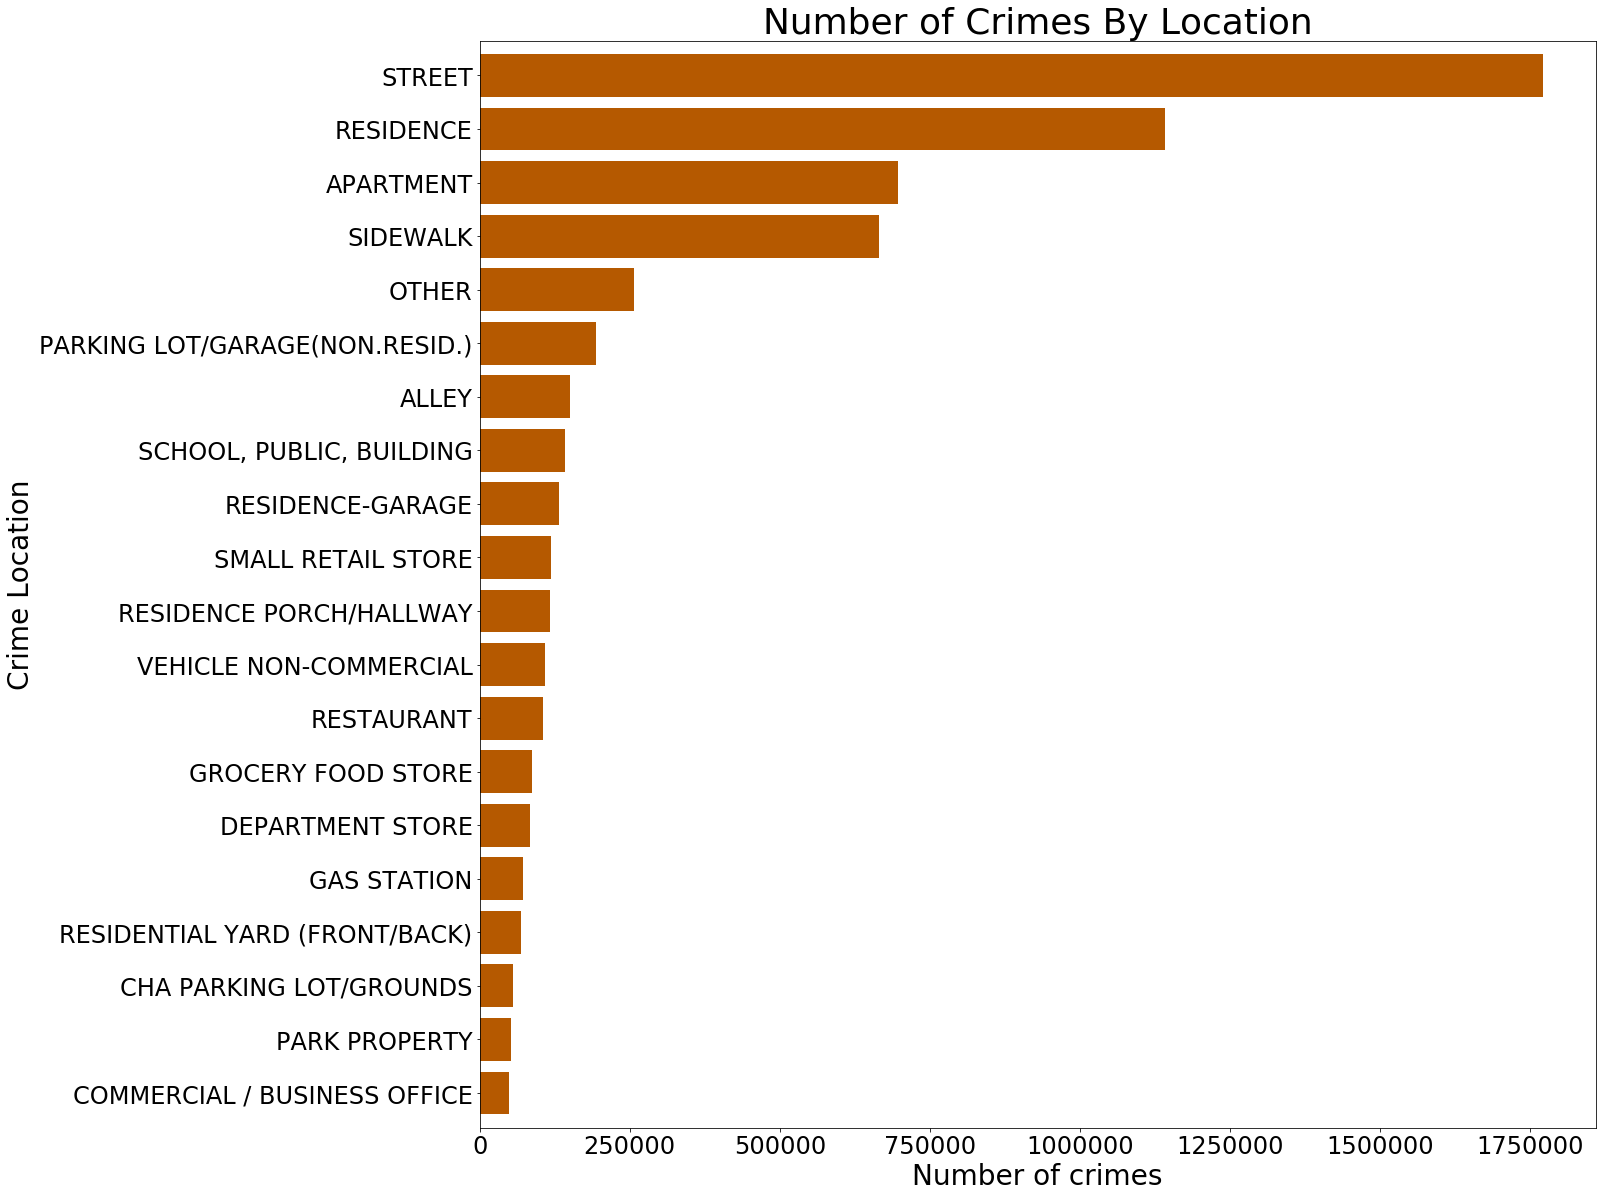

In [33]:
crime_location  = crimes.groupBy("LocationDescription").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location = crime_location.iloc[:20]
myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "#b55900", width = 0.8,
                               x = "location", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()